In [11]:
import numpy as np
import matplotlib.pyplot as plt

In [19]:
# constants 
path = "E:\\Andreea\\Projects\\Git\\SmartsuitWrapper\\SmartuistWrapper\\tapResultParticipants.csv"
playerNr = 34

idxLength = 28
idxGain = 29

In [20]:
def readFromFile(path):
    results = [0] * 100
    f = open(path, "r")
    player = -1
    for x in f:
        line = x.split(',')
        if len(line) == 31:
            if int(line[0]) == player:
                results[player].append(line)
            else:
                player = int(line[0])
                results[player] = []
                results[player].append(line)
    f.close()
    return results


# a list with the results at idx for the given player    
def getResultPerPlayer(p, results, idx, unique ):
    tmp = results[p]
    values = []
    for words in tmp:
        values.append(float(words[idx]))
    if (unique == True):
        values =  [x for i, x in enumerate(values) if i == values.index(x)]
    return values

# sort list1 - use the indexes of the sorted list1 to rearrage list2    
def getCombinedPlot(list1, list2):
    idx   = np.argsort(list1)
    list1 = np.array(list1)[idx]
    list2 = np.array(list2)[idx]
    
    plt.xticks(np.arange(min(list1), max(list1)+1, 1.0))
    plt.plot(list1[1:], list2[1:], 'o-')
    plt.show()
        
    return (list1, list2)

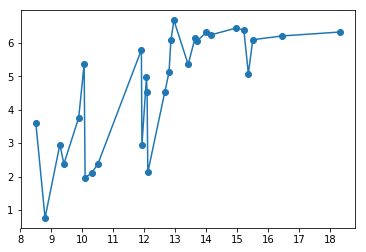

[1.        3.612064  0.7624243 2.956702  2.377481  3.757343  5.360667
 1.967102  2.104688  2.377481  5.78683   2.939095  4.960778  4.524059
 2.124304  4.512621  5.115363  6.075502  6.671975  5.351322  6.133724
 6.042047  6.306652  6.233872  6.433743  6.382715  5.076089  6.090688
 6.203413  6.319949 ]
[-1.        8.496765  8.795725  9.274282  9.403995  9.881987 10.0575
 10.08904  10.29817  10.5032   11.90687  11.92386  12.06991  12.09068
 12.11372  12.65948  12.79878  12.85975  12.95614  13.41694  13.63681
 13.69612  13.99775  14.15034  14.94725  15.21498  15.36065  15.50456
 16.46087  18.32498 ]
Optimal lenght:  6.204683333333334


In [21]:
results = readFromFile(path)

lengths = getResultPerPlayer(playerNr, results, idxLength, True)
gain = getResultPerPlayer(playerNr, results, idxGain, True)

for i in range(len(lengths)-1, 1, -1):   
        lengths[i] = lengths[i-1]


gain, lengths = getCombinedPlot(gain, lengths)

# get avg length for the top 3 values of gain
print(lengths)
print(gain)
avg = sum(lengths[-3:]) / 3
print("Optimal lenght: ", avg)